1) in one code cell, show all code used to create long data from from raw data 

In [2]:
import pandas as pd
import numpy as np

#import raw data
data_2018 = pd.read_csv("weekly_patterns_2018_sample.csv")
#data_2018
data_2019 = pd.read_csv("weekly_patterns_2019_sample.csv")
#data_2019
data_2020 = pd.read_csv("weekly_patterns_2020_sample.csv")
#data_2020
data_2021 = pd.read_csv("weekly_patterns_2021_sample.csv")
#data_2021
data_2022 = pd.read_csv("weekly_patterns_2022_sample.csv")
#data_2022

#subset
df_2018 = data_2018[data_2018['brands'] == 'Olive Garden']
df_2019 = data_2019[data_2019['brands'] == 'Olive Garden']
df_2020 = data_2020[data_2020['brands'] == 'Olive Garden']
df_2021 = data_2021[data_2021['brands'] == 'Olive Garden']
df_2022 = data_2022[data_2022['brands'] == 'Olive Garden']
wide_sample = pd.concat([df_2018, df_2019, df_2020, df_2021,df_2022])

#clean date_range_start variable
wide_sample['date_range_start'] = pd.to_datetime(wide_sample['date_range_start'],utc = True).dt.normalize()
wide_sample['date_range_end']=  pd.to_datetime(wide_sample['date_range_end'], utc = True).dt.normalize()

#split visits_by_day
visits_by_day_lists = wide_sample['visits_by_day'].str.replace('[\[\]]', '', regex=True).str.split(',', expand=True)
visits_by_day_lists

for i in range(7):
    wide_sample[f'daily_visits{i+1}'] = visits_by_day_lists[i].astype(int)

#reshape data/converting daily visits to integer
id_vars = ['placekey', 'city', 'region', 'date_range_start', 'date_range_end',
           'raw_visit_counts', 'visits_by_day', 'safegraph_brand_ids',
           'naics_code', 'postal_code', 'brands']

# Define the value_vars (these are the daily visits columns to be melted)
value_vars = ['daily_visits1', 'daily_visits2', 'daily_visits3', 'daily_visits4',
              'daily_visits5', 'daily_visits6', 'daily_visits7']

long_sample = wide_sample.melt(id_vars=id_vars, value_vars=value_vars, var_name='day', value_name='dailyvisits')
summary_stats = long_sample['dailyvisits'].describe()

#create dayofweek
long_sample['dayofweek'] = long_sample['day'].str[-1].astype(int)

days_of_week = {1: 'Monday', 2: 'Tuesday',
                3: 'Wednesday', 4: 'Thursday',
                5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
long_sample['dayofweek'] = long_sample['dayofweek'].map(days_of_week)

#manyvisits
threshold = long_sample['dailyvisits'].mean()

long_sample['manyvisits'] = (long_sample['dailyvisits'] > threshold).astype(int)

#core_biz_area, and geographic variables
region_frequency = long_sample['region'].value_counts()
region_frequency

threshold = region_frequency.mean()

# Define the core business areas based on the threshold
# the regions above the mean is 1 and the regions under the mean is 0
long_sample['core_biz_area'] = long_sample['region'].apply(lambda x: 1 if region_frequency[x] >= threshold else 0)
long_sample

,placekey,city,region,date_range_start,date_range_end,raw_visit_counts,visits_by_day,safegraph_brand_ids,naics_code,postal_code,brands,day,dailyvisits,dayofweek,manyvisits,core_biz_area
0,222-222@8dy-ssr-z2k,Bayou Cane,LA,2018-01-01 00:00:00+00:00,2018-01-08 00:00:00+00:00,170,"[25,12,12,23,41,38,19]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,70360,Olive Garden,daily_visits1,25,Monday,0,1
1,222-222@5s6-9w8-skf,Mishawaka,IN,2018-11-19 00:00:00+00:00,2018-11-26 00:00:00+00:00,167,"[19,21,25,1,52,26,23]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,46545,Olive Garden,daily_visits1,19,Monday,0,1
2,222-222@5qs-zmp-gc5,Oklahoma City,OK,2018-03-26 00:00:00+00:00,2018-04-02 00:00:00+00:00,223,"[31,30,24,25,35,41,37]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,73118,Olive Garden,daily_visits1,31,Monday,0,1
3,222-222@5xq-dzd-b8v,Santa Maria,CA,2018-01-15 00:00:00+00:00,2018-01-22 00:00:00+00:00,121,"[22,17,13,10,20,18,21]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,93454,Olive Garden,daily_visits1,22,Monday,0,1
4,222-222@62k-p8d-jqf,Stoughton,MA,2018-05-14 00:00:00+00:00,2018-05-21 00:00:00+00:00,107,"[6,4,6,9,24,34,24]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,2072,Olive Garden,daily_visits1,6,Monday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354041,22h-222@629-38p-4jv,West Hartford,CT,2022-12-05 00:00:00+00:00,2022-12-12 00:00:00+00:00,211,"[15,15,20,19,39,71,32]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,6110,Olive Garden,daily_visits7,32,Sunday,0,0
354042,222-222@63k-b4h-cqz,Fort Wayne,IN,2022-02-21 00:00:00+00:00,2022-02-28 00:00:00+00:00,456,"[42,38,56,35,88,120,77]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,46805,Olive Garden,daily_visits7,77,Sunday,1,1
354043,22b-222@5qv-tcj-gp9,Prosper,TX,2022-09-12 00:00:00+00:00,2022-09-19 00:00:00+00:00,303,"[28,24,34,46,57,68,46]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,75078,Olive Garden,daily_visits7,46,Sunday,1,1
354044,222-223@5z4-ktq-7dv,San Bernardino,CA,2022-10-24 00:00:00+00:00,2022-10-31 00:00:00+00:00,244,"[40,26,34,24,44,31,45]",SG_BRAND_29e52fe03f73e6ce21a527123c4d97b0,722511,92408,Olive Garden,daily_visits7,45,Sunday,1,1


In your long data, what are the unique values of your dayofweek variable? Generate a variable weekend = 1 if it is Saturday or Sunday, and 0 otherwise. How many observations do you have for weekend and weekdays? (This is a sanity check of your data.)

In [3]:
unique_days_of_week = long_sample['dayofweek'].unique()
print(unique_days_of_week)
long_sample['weekend'] = long_sample['dayofweek'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
weekend_count = long_sample['weekend'].sum()
weekday_count = len(long_sample) - weekend_count

print(weekend_count) #101156 observations
print(weekday_count) #252890 observations

['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
101156
252890


In [4]:
#Save your long data to a csv file, specify index  = False.
import glob
long_sample.to_csv('long_sample_csv.csv', index=False)

Part 2: Use histograms to describe dailyvisits 

Question 2a (1 point): Describe the variable “dailyvisits”. How many observations do you have? What are the minimum, maximum, average, and median of this variable? How many observations have dailyvisits equal to zero? How many observations have dailyvisits above 100 (including 100)? How many observations have dailyvisits above 1000 (including 100?

 

In [6]:
observations_dailyvisits = long_sample['dailyvisits'].count()
print(observations_dailyvisits) #354046

dailyvisits_summary = long_sample['dailyvisits'].describe()
print(dailyvisits_summary) 

zero_dailyvisits_count = (long_sample['dailyvisits'] == 0).sum()
print(zero_dailyvisits_count) #4277

above_100_count = (long_sample['dailyvisits'] >= 100).sum()
print(above_100_count) #4377

above_1000_count = (long_sample['dailyvisits'] >= 1000).sum()
print(above_1000_count) #0

354046
count    354046.000000
mean         32.921747
std          21.625747
min           0.000000
25%          18.000000
50%          29.000000
75%          43.000000
max         269.000000
Name: dailyvisits, dtype: float64
4277
4377
0


Question 2b (1 point): Draw a histogram of “dailyvisits” for the whole sample. On the horizontal axis, mark clearly what range of dailyvisits each bin corresponds to. Explain why you choose such bin definitions. Include the proper y axis and title. (Hint: given the skewness of the distribution of dailyvisits in Question 1a, you may want the whole histogram to focus on a sub-range of dailyvisits, e.g. 0-50. If you decide to do so, explain why you choose this sub-range.)

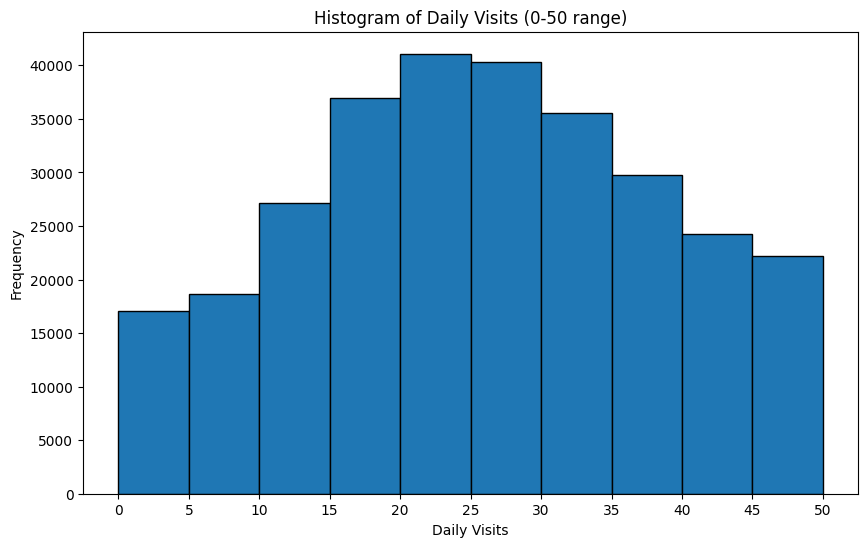

In [7]:
import matplotlib.pyplot as plt

bin_width = 5
bins = range(0, 55, bin_width) 

plt.figure(figsize=(10, 6))
plt.hist(long_sample['dailyvisits'], bins=bins, edgecolor='black')

plt.title('Histogram of Daily Visits (0-50 range)')
plt.xlabel('Daily Visits')
plt.ylabel('Frequency')
plt.xticks(bins)

plt.show()

#I chose this subrange to zoom in on the skewed data, the distribution of daily_visits 
# is skewed to the left from a bigger range, and to nicely fit the data in the histogram
# where most of the distribution is, I zoomed in, I chose bin_width 5 as it does a good job
# displaying the descriptive stats of the daily_vists variable:
#ex. the mean , median, and different quartitiles. 

Question 2c (1 point): Using the same bin definition as in Question 1b, draw a grouped histogram with “dailyvisits” for all weekdays as one group, and all weekend days as another group. For clear comparison, you should use one color for the weekday group, and another color for the weekend group. The two sets of bars should appear in the same picture. Include the proper axis, title and legend. Comment on at least one difference between the distribution of “dailyvisits” in weekdays and weekends.

 

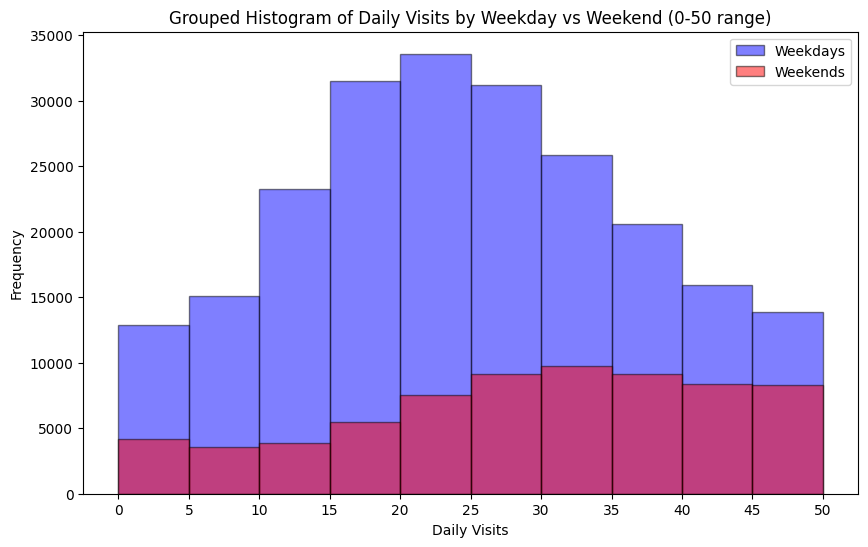

In [8]:
weekdays = long_sample[long_sample['weekend'] == 0]['dailyvisits']
weekends = long_sample[long_sample['weekend'] == 1]['dailyvisits']

bin_width = 5
bins = range(0, 55, bin_width) 

plt.figure(figsize=(10, 6))


plt.hist(weekdays, bins=bins, alpha=0.5, label='Weekdays', color='blue', edgecolor='black')
plt.hist(weekends, bins=bins, alpha=0.5, label='Weekends', color='red', edgecolor='black')


plt.legend(loc='upper right')
plt.title('Grouped Histogram of Daily Visits by Weekday vs Weekend (0-50 range)')
plt.xlabel('Daily Visits')
plt.ylabel('Frequency')
plt.xticks(bins) 

plt.show()

#one difference between the distribution of dailyvisits in weekdays and weekends is that
#the bars representing weekdays in blue are taller than those on the weekends which means
#that weekdays have more visits than the weekends. 

Part 3: Pie chart of total visits by day of week 

Question 3a (1 point): Calculate the sum of dailyvisits by Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday.  Show the results in a table.  

In [8]:
dailyvisits_by_dayofweek = long_sample.groupby('dayofweek')['dailyvisits'].sum().reset_index()

sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dailyvisits_by_dayofweek['dayofweek'] = pd.Categorical(dailyvisits_by_dayofweek['dayofweek'], categories=sorted_days, ordered=True)
dailyvisits_by_dayofweek = dailyvisits_by_dayofweek.sort_values('dayofweek')

dailyvisits_by_dayofweek  

,dayofweek,dailyvisits
1,Monday,1312846
5,Tuesday,1259459
6,Wednesday,1344186
4,Thursday,1413325
0,Friday,2028832
2,Saturday,2326422
3,Sunday,1970743


Question 3b (1 point): Draw a pie chart of total dailyvisits across the seven days of week. Each day of week should appear as a slice in this pie, with a different color. Mark % of total dailyvisits in each slice (or right next to each slice if some slices are too small). By definition, these percentages should add up to 100%. Include proper title and legend.

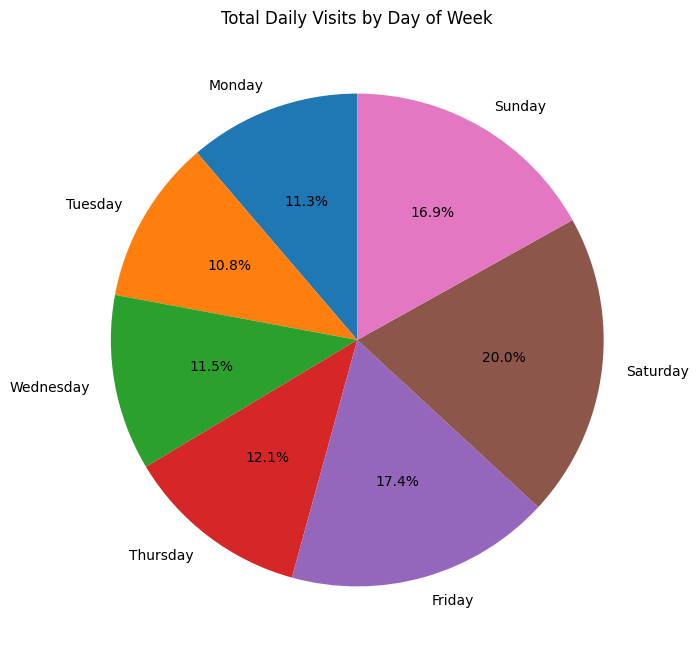

In [10]:
plt.figure(figsize=(8, 8))
plt.pie(
    dailyvisits_by_dayofweek['dailyvisits'],
    labels=dailyvisits_by_dayofweek['dayofweek'],
    autopct='%1.1f%%',  # Format for the percentage labels
    startangle=90  # Start the first slice at the top
)

plt.title('Total Daily Visits by Day of Week')
plt.show()

Part 4: Bar chart of average dailyvisits by some geographic variable

 

Question 4a (1 point): Calculate average dailyvisits by your choice of a geographic variable.  Show the results in a table.  (Hint: you want the table to be readable. If your chain covers over 1000 zip codes, you may think twice whether zip code is the right level of geography you want to use for this tab)

 

In [11]:
#choice of geographic variable -> region

average_dailyvisits_by_region = long_sample.groupby('region')['dailyvisits'].mean().reset_index()

average_dailyvisits_by_region = average_dailyvisits_by_region.sort_values('dailyvisits', ascending=False)

average_dailyvisits_by_region

,region,dailyvisits
1,AR,73.657143
0,AL,63.578270
12,KS,57.035577
20,MS,55.353585
36,TX,46.910584
29,OK,46.487175
14,LA,45.818610
35,TN,44.440795
33,SC,42.616672
42,WV,41.927750


Question 4b (1 point): Draw average dailyvisits in a bar chart, where the horizontal axis is your geographic variable, and the vertical axis is average dailyvisits in each geography. On top of each bar, report the value of average dailyvisits for that bar (up to 1 decimal point). Hint: these values should be the same as in your answer to Question 4a, except for rounding error. Include the proper axis and title. But if the geographic variable you choose in Question 4a takes too many values to appear in one graph, you may want to reconsider the geographic variable. 

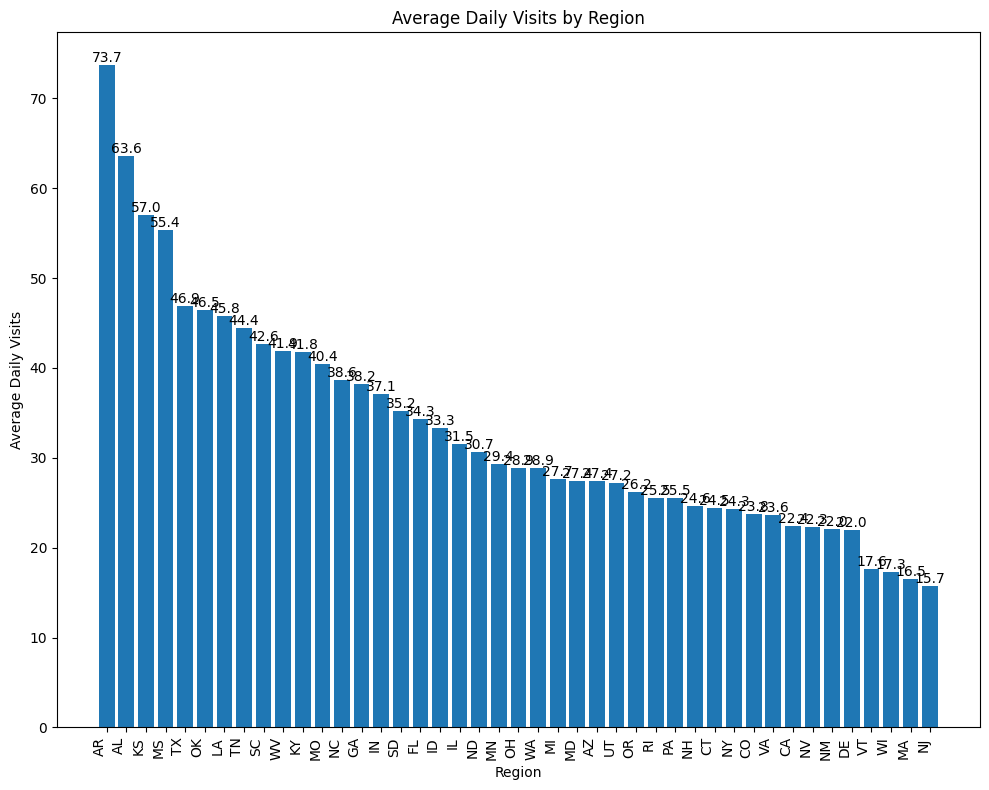

In [12]:
plt.figure(figsize=(10, 8))
bars = plt.bar(average_dailyvisits_by_region['region'], average_dailyvisits_by_region['dailyvisits'])

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.title('Average Daily Visits by Region')
plt.xlabel('Region')
plt.ylabel('Average Daily Visits')

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=90, ha='right')

plt.tight_layout()  # Adjust the layout to fit everything nicely
plt.show()

Question 4c (1 point): Draw another bar chart of average dailyvisits, with the geographic variable on the horizontal axis as in Question 4b.  But in this bar chart, you plot two sets of bars, one set includes all days up to March 13, 2020 (including March 13); the other set includes all days after March 13, 2020. (March 13 is the day that US announced national emergency because of COVID). The two sets of bars should use different colors for clear comparison. Include the proper axis, title and legend. Comment on at least two differences between the two sets in the bar chart.

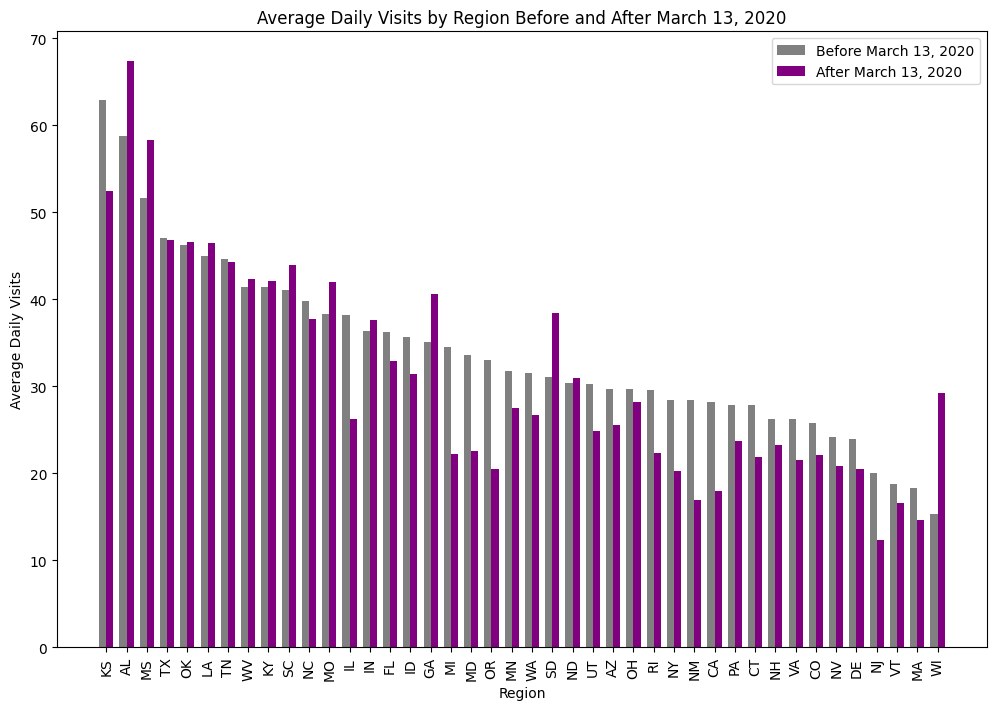

In [17]:
before_covid = long_sample[long_sample['date_range_start'] <= '2020-03-13']
after_covid = long_sample[long_sample['date_range_start'] > '2020-03-13']

#average dailyvisits by region for each
avg_dailyvisits_before_covid = before_covid.groupby('region')['dailyvisits'].mean().reset_index()
avg_dailyvisits_after_covid = after_covid.groupby('region')['dailyvisits'].mean().reset_index()

# Merge the two sets on 'region' for comparison
merged_data = pd.merge(avg_dailyvisits_before_covid, avg_dailyvisits_after_covid, on='region', suffixes=('_before', '_after'))

# Sort the merged data 
merged_data.sort_values('dailyvisits_before', ascending=False, inplace=True)

# Draw the bar chart
plt.figure(figsize=(12, 8))
width = 0.35 
x = np.arange(len(merged_data['region']))  

# Plot
plt.bar(x - width/2, merged_data['dailyvisits_before'], width, label='Before March 13, 2020', color='grey')
plt.bar(x + width/2, merged_data['dailyvisits_after'], width, label='After March 13, 2020', color='purple')

plt.xlabel('Region')
plt.ylabel('Average Daily Visits')
plt.title('Average Daily Visits by Region Before and After March 13, 2020')
plt.xticks(x, merged_data['region'], rotation=90)
plt.legend()

plt.show()

#2 differences 
#1 difference includes the decrease in the number of visits in almost all regions after March 13th,2020.
#This is seen as the purple bar is often <= the than the grey bar, for most states. This also makes
#sense as post March 13,2020 led to a lot of shutdown of resturants which restrained consumers from
#going to resturants and other public places. Another difference I noticed is the impact is varied
#amongst different regions. Some regions were affected more than others, while some regions increased
#in the number of average daily visits by region after March 13,2020. Overall, it shows that the
#pandemic had a general negative impact by region.

Question 5a (1 point): Calculate average dailyvisits by month. Show the results in a table. (Hint: the number of rows in this table should correspond to the number of unique year-month in your data.)

In [18]:
long_sample['year_month'] = long_sample['date_range_start'].dt.to_period('M')

# average dailyvisits by year-month
average_dailyvisits_by_month = long_sample.groupby('year_month')['dailyvisits'].mean().reset_index()

average_dailyvisits_by_month

C:\Users\pgopi\AppData\Local\Temp\ipykernel_2652\2864736920.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  long_sample['year_month'] = long_sample['date_range_start'].dt.to_period('M')


,year_month,dailyvisits
0,2018-01,22.477909
1,2018-02,25.041475
2,2018-03,26.870582
3,2018-04,29.482216
4,2018-05,29.212727
5,2018-06,28.651648
6,2018-07,30.197644
7,2018-08,29.665626
8,2018-09,26.503489
9,2018-10,30.775154


Question 5b (1 point): Draw average dailyvisits in a line chart, where the horizontal axis is year-month, and the vertical axis is average dailyvisits in each year-month. Add a vertical line for each beginning of year (in black) and a vertical line for March 2020 (in red). Include proper axis, title, legend.

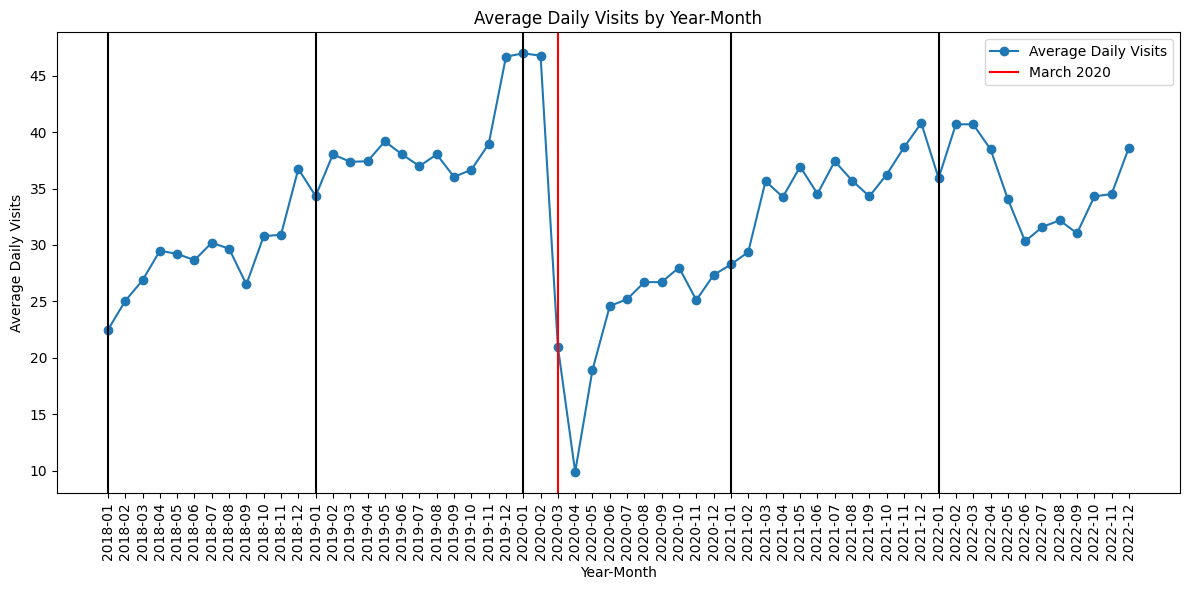

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(average_dailyvisits_by_month['year_month'].astype(str), average_dailyvisits_by_month['dailyvisits'], marker='o', label='Average Daily Visits')

# Draw a vertical line for March 2020
plt.axvline('2020-03', color='red',  label='March 2020')

#vertical lines for each January (beginning of the year)
for year in range(average_dailyvisits_by_month['year_month'].min().year, average_dailyvisits_by_month['year_month'].max().year + 1):
    plt.axvline(f'{year}-01', color='black')

# Set title and labels
plt.title('Average Daily Visits by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Average Daily Visits')

plt.xticks(rotation=90)

plt.legend()

plt.tight_layout()
plt.show()

Question 5c (1 point): Draw another line plot where the horizontal axis is year-month. This chart should contain four lines: (1) average dailyvisits; (2) median dailyvisits; (3) 25th percentile of dailyvisits, and (4) 75th percentile of dailyvisits. Use different colors or line patterns to make sure that readers know which line is for which metric. Shade the area between the 25th and 75th percentile lines in grey.  Also include a vertical line for each beginning of year (in black) and a vertical line for March 2020 (in red). Include proper axis, title, legend. Make at least two comments about the visual pattern of dailyvisits in this chart.

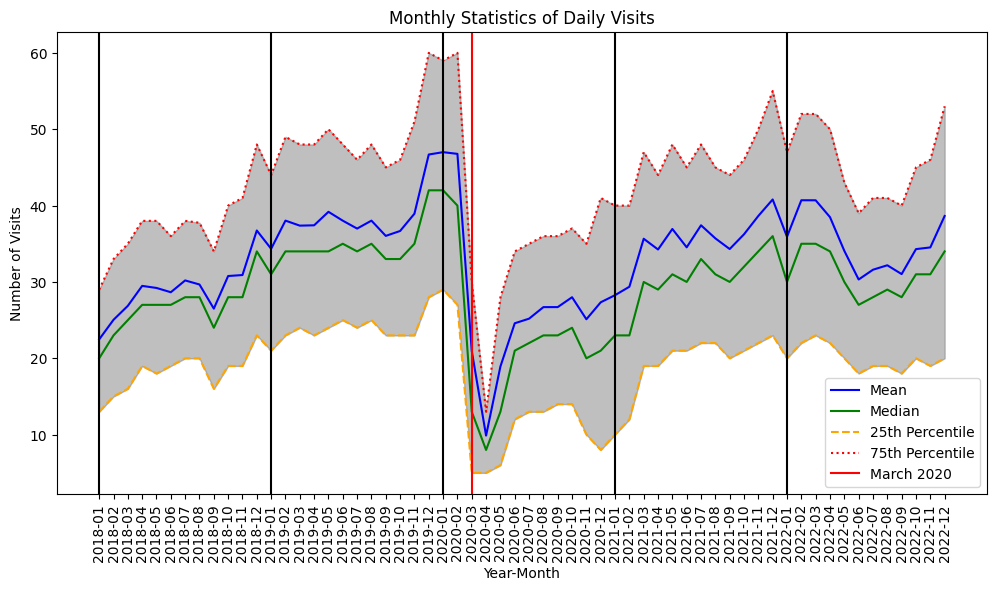

In [19]:
monthly_stats = long_sample.groupby('year_month')['dailyvisits'].agg(['mean', 'median', 
                                                                       lambda x: np.percentile(x, 25), 
                                                                       lambda x: np.percentile(x, 75)]).reset_index()


monthly_stats.columns = ['year_month', 'mean', 'median', '25th_percentile', '75th_percentile']

# Plotting lines
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['year_month'].astype(str), monthly_stats['mean'], label='Mean', color='blue')
plt.plot(monthly_stats['year_month'].astype(str), monthly_stats['median'], label='Median', color='green')
plt.plot(monthly_stats['year_month'].astype(str), monthly_stats['25th_percentile'], label='25th Percentile', color='orange', linestyle='--')
plt.plot(monthly_stats['year_month'].astype(str), monthly_stats['75th_percentile'], label='75th Percentile', color='red', linestyle=':')

# Shading the area between the 25th and 75th percentile lines
plt.fill_between(monthly_stats['year_month'].astype(str), 
                 monthly_stats['25th_percentile'], 
                 monthly_stats['75th_percentile'], 
                 color='grey', alpha=0.5)

# Add vertical lines for each January and for March 2020
for year in monthly_stats['year_month'].dt.year.unique():
    plt.axvline(pd.Timestamp(year=year, month=1, day=1).strftime('%Y-%m'), color='black')
plt.axvline('2020-03', color='red', label='March 2020')

plt.title('Monthly Statistics of Daily Visits')
plt.xlabel('Year-Month')
plt.ylabel('Number of Visits')

plt.xticks(rotation=90)  
plt.legend()
plt.show()

#2 comments
#1: there is an evident decline in March 2020 in all for lines which reflects the immediate
#imapct of the pandemic on daily visits. this could be due to lockdown and other emergency
#protocols the government imposed early in the pandemic.
#2: post the evident decline in March 2020, the graph shows recovery in daily visits over time after
# March 2020. it indicates that over time some regions increased their visitation numbers, while
#others were still hit bad due to the pandemic decline, revealing an uneven recovery.

Question 6 (1 point): Draw a box plot of dailyvisits by quarter. The horizontal axis should show quarters in your data. The chart should show one box (with whiskers) per year-quarter. If you think the chart is too crowded, you can draw the chart by half-year or year instead of quarter. Make at least one comment about the visual pattern of dailyvisits in this chart, and another comment on the comparison of this chart and the line chart you have produced in Question 4c.

C:\Users\pgopi\AppData\Local\Temp\ipykernel_2652\2856748878.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  long_sample['quarter'] = long_sample['date_range_start'].dt.to_period('Q')


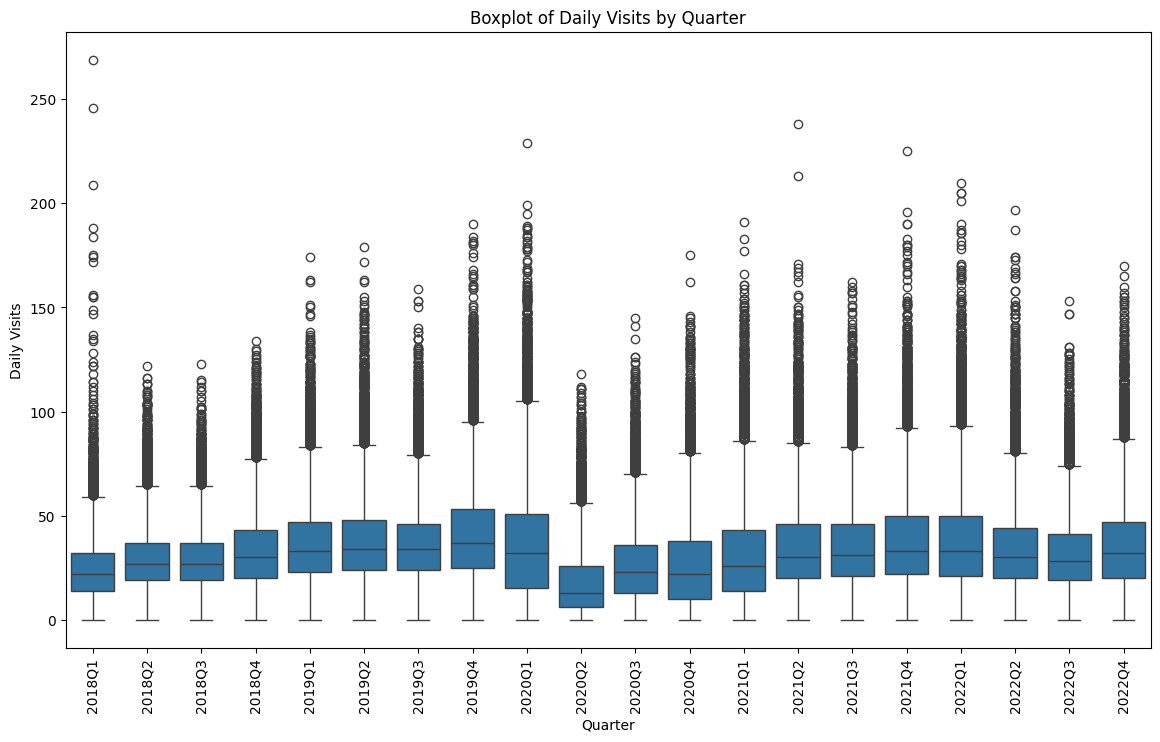

In [20]:
import seaborn as sns

long_sample['quarter'] = long_sample['date_range_start'].dt.to_period('Q')

# Sort the data by quarter
long_sample = long_sample.sort_values(by='quarter')

plt.figure(figsize=(14, 8))
sns.boxplot(x='quarter', y='dailyvisits', data=long_sample)

plt.xticks(rotation=90)

plt.title('Boxplot of Daily Visits by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Daily Visits')

plt.show()

#comment about the visual patterns of daily visits in boxplot
#one comment in regards to the visual patterns of daily_visits via boxplots includes
#the seasonal variation in the data. some quarters have higher medians, means, (larger
#central measures of tendency, higher IQR than other quarters, and this could imply
#that certain times of the year are more busier and thus have higher daily visits 
#than other times of the years. This could be due to holidays, etc.

#Comment on the comparison of this chart and the line chart from 4c)
#both the box plot and the line chart from the previous question offer different
#perspectives to the data. Line chart shows the trend of daily visits OVERTIME
#in regards to measures of central tendency, mean, median, Q1,Q3, etc. box plot
#captures daily visit distribution by each quarter, the line graph does not do this,
#but rather takes a period (in this case a quarter) and depicts the the distribution of daily
#visits within a period (quarter)

Part 7: Geographic distribution of dailyvisits

Question 7 (2 points): now that you have visualized dailyvisits over time, try to visualize the geographic distribution of dailyvisits in a US map.  Please comment on (a) whether the chart passes a smell test based on some public information you have seen about your chain on the internet; (b) what you learn from this geographic visualization; and (c) how it may help a particular business decision inside your restaurant chain. 

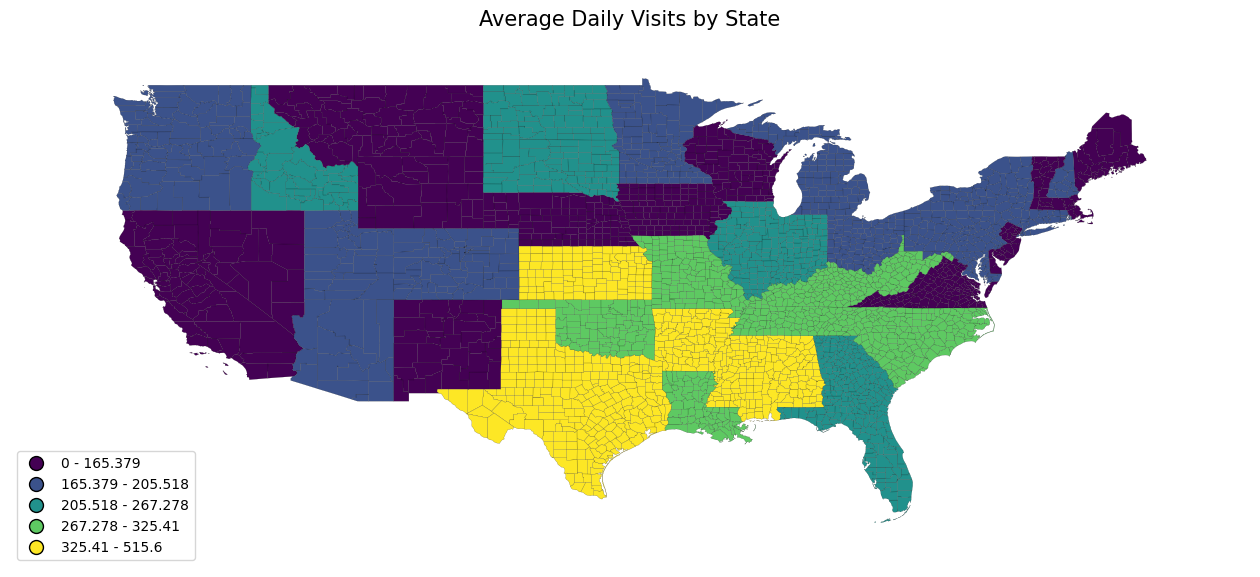

In [28]:
long_sample
import geopandas as gpd
import geoplot as gplt
import mapclassify as mc


geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')


geoData.id = geoData.id.astype(str).astype(int)


stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]


geoData = geoData.explode(index_parts=True)


state_id = {
    'AL': '01', 'AK': '02', 'AZ': '04', 'AR': '05', 'CA': '06',
    'CO': '08', 'CT': '09', 'DE': '10', 'FL': '12', 'GA': '13',
    'HI': '15', 'ID': '16', 'IL': '17', 'IN': '18', 'IA': '19',
    'KS': '20', 'KY': '21', 'LA': '22', 'ME': '23', 'MD': '24',
    'MA': '25', 'MI': '26', 'MN': '27', 'MS': '28', 'MO': '29',
    'MT': '30', 'NE': '31', 'NV': '32', 'NH': '33', 'NJ': '34',
    'NM': '35', 'NY': '36', 'NC': '37', 'ND': '38', 'OH': '39',
    'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45',
    'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VT': '50',
    'VA': '51', 'WA': '53', 'WV': '54', 'WI': '55', 'WY': '56',
}

long_sample['state_code'] = long_sample['region'].map(state_id)

long_sample['dailyvisits_sum'] = long_sample['visits_by_day'].apply(lambda x: sum(eval(x)))
state_daily_visits = long_sample.groupby('state_code')['dailyvisits_sum'].mean().reset_index()


fullData = pd.merge(geoData, state_daily_visits, how='left', left_on='STATE', right_on='state_code')
fullData['dailyvisits_sum'] = fullData['dailyvisits_sum'].fillna(0)  # Handling null values


fig, ax = plt.subplots(1, 1, figsize=(16, 12))


scheme = mc.Quantiles(fullData['dailyvisits_sum'], k=5) 

gplt.choropleth(
    fullData,
    hue="dailyvisits_sum",  
    linewidth=.1,
    scheme=scheme,
    cmap='viridis',
    legend=True,
    edgecolor='black',
    ax=ax
)

ax.set_title('Average Daily Visits by State', fontsize=15);

plt.show()
 

In [29]:
#a) this chart makes sense and passes the smell test, because according to Google Search the 
#state with the most number of Olive Garden locations in the US is Texas, which
# correlates with why Texas is colored yellow, with a high average daily visit rate. 
#b) This geographic visualization has showed me the range/performance of daily visits
#in areas across the US. I can see which regions have the highest performance, most number
#daily visits. I can also see which regions/areas have lowest daily visits. This can show
#where the resturant chain is successful and where we need improvement and how we can improve
#to make other resturant regions also sucessful.
#c) business decisions that can be benefited from a geographic distribution of dailyvisits
#include identifying potential places for new resutrants influenced on the regions/areas
#where there are high visits. Other business decisions could be imposing specific marketing
#strategies depending on resturant performance at a specific region/area, and allocating more 
#resources and taking better measures to optimize higher resturant performance and more daily visits